![](DaThabor_Logo.png)

----------

# MENTORING SESSIONS

<br>

May, 2020

<br>

## Simple Linear Regression

<br>

### ADVERTISING DATA SET


<br>

----------

The first step while using Python is to make sure that all packages are loaded into the environment. `pandas` and `numpy` are the most commonly used. The other packages you will come by along the way, e.g. when plotting data or doing machine learning model engineering.

<br>

To import the packages either select the `cell block` below and hit SHIFT+ENTER, or go to the menu --> Cell --> Run Cells (this will run all cells in the notebook).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

then of course we will be needing data to work with, so we load the data into the environment as well. And we look at the first 5 observations (rows) in the data set, to get a quick idea of how the data looks like

In [2]:
# Read the data
data = pd.read_csv("Advertising.csv")

In [3]:
# Get the first 5 observations (rows)
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Describe the data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Get the shape of the data (rows, columns)
data.shape

(200, 4)

As we can see we have 4 columns in the data set: `TV`,`Radio`,`Newspaper` and `Sales`. All of them have numerical values. 

<br>

For this notebook, we want to look at predicting the Sales amount, based on the budget set for either `TV`,`Radio` or `Newspaper`. Let's plot all of them separately to get an idea of the data. First we have a look at the correlation between the variables.

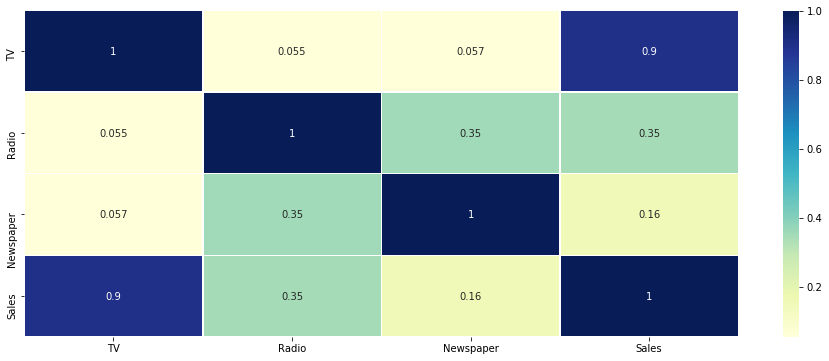

In [6]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), 
            cmap="YlGnBu", 
            annot = True, 
            linewidths=.5)
plt.show()

We can see that `TV` is highly correlated with `Sales` (0.9). Let's confirm this by looking at the scatterplots of the 3 variables `TV`, `Radio` and `Newspaper`

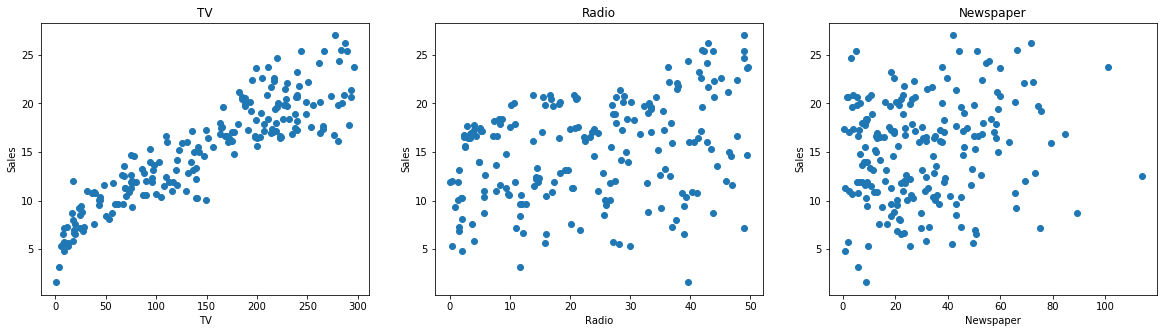

In [7]:
plt.figure(figsize=(20, 5))

features = ['TV', 'Radio', 'Newspaper']
target = data['Sales']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sales')

From here we can confirm that there is some linear relation between `TV` and `Sales`, which we can find in the left-most plot.

<br>

Let's find the equation for the regression line (straight line) for the `TV` variable in relation to `Sales`

In [8]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X + \u03B5".format(reg.intercept_[0], 
                                                                reg.coef_[0][0]))

The linear model is: Y = 6.9748 + 0.055465X + ε


Let's add the equation of the straight line to our plot, to see how this relates to the data points we have.

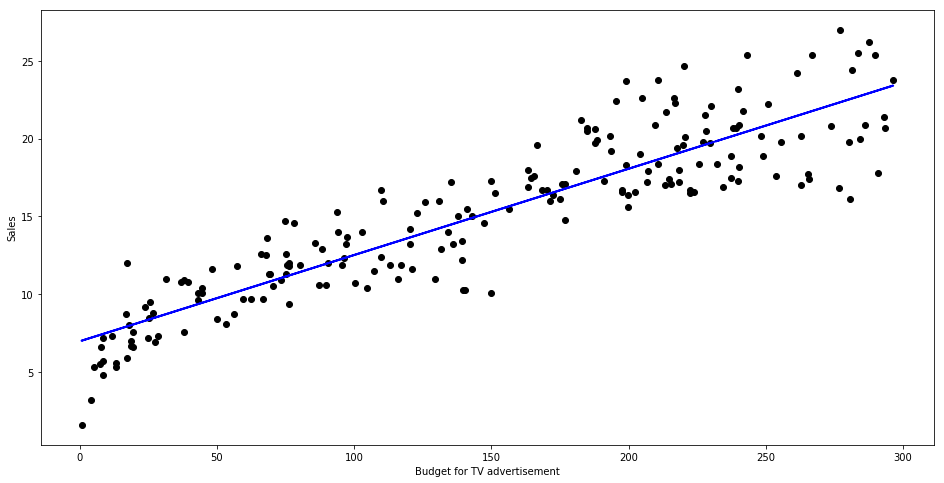

In [9]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Budget for TV advertisement")
plt.ylabel("Sales")
plt.show()

So this confirms that the corrrelation between `TV` and `Sales` is indeed the highest with a value of 0.9. So for our linear regression model, we will be using the `TV` variable to predict the `Sales` amount.

<br>

The following code is used to calculate the values for the linear regression, which are following this mathematical formula for a straight line:

$y = \beta_{0} + \beta_{1}x + \epsilon$

<br>

- ,where $\beta_{0}$ = y-intercept;
- and $\beta_{1}$ = slope of the line;
- and $\epsilon$ is a random error margin

<br>

Next up we use an `Ordinary Least Squares` function to calculate the regression and we summarize this

In [10]:
X = data['TV']
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 03 May 2020   Prob (F-statistic):           7.93e-74
Time:                        08:56:36   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

Based on this summary we have a look at the R-squared, Adjusted R-Square and the P-value.

    R-squared = 0.812
    Adj. R-squared = 0.811
    P-value = ~0.000

<br>

Now let's run a different linear regression model by assigning the `TV` and `Sales` variables again

In [11]:
X = pd.DataFrame(np.c_[data['TV']], columns = ['TV'])
Y = data['Sales']

Then we split the data into a train set (for training the model and finding the best fitted model). Then we have a split for a test set, to check whether the train set performed well.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


We run the Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

And we evaluate the results by looking at the RMSE (Root Mean Square Error) and the R-squared value

In [14]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.2937024724637265
R2 score is 0.8160588254512798


The model performance for testing set
--------------------------------------
RMSE is 2.2540353405641573
R2 score is 0.7879924840593133


From this summary we can find a few important values to check:

On our train data we found a R-squared value of 0.81, but while evaluating on the test data, the performance on R-squared went down to 0.78, which is still a good number.



![](DaThabor_Logo.png)

----------

# ASSIGNMENT

<br>

May, 2020

<br>

## Housing Prices

<br>

----------

Get the Housing Prices data set as below and create your own simple linear regression model based on the `house price` and any variable that has a correlation with the housing price.

<br>

### Assignment I | Run your own linear regression model on the Boston housing data set

Take this notebook and add your own analysis in words and decide your own Python code to run the soltution.

[Full Linear Regression]()


<br>

### Assignment II | Create your own notebook in words (code is provided)

Take this notebook and add your own analysis in words, the python code is already provided.

[Explain the code in your own words]()


<br>

### Assignment I | Create your own notebook with python code (text is provided)

Take this notebook and add your python code, the text is already provided.

[Write the python code based on the text]()

### FULL SOLUTION

The full solution is given here

In [15]:
%run Simple Linear Regression - Full Solution.ipynb

ERROR:root:File `'Simple.py'` not found.
